# <center> Homework : Errors in Markov Chains and PageRank</center>



The goal of this homework is to twofold: In the first part you should evaluate errors in Markov chain Monte Carlo. In the second part you study PageRank algorithm.

## <center> Part I: Markov Chain Monte Carlo</center>

### A particle on the top of a Mexican hat

We consider a particle on the xy plane confined by a two dimensional external potential:
$$V(\vec{r}) = r^4 - 8 r^2$$
where $\vec{r}=(x,y)$ and $r=\sqrt{x^2+y^2}$ indentify the particle position and its disance from the origin. We assume the particle at the equilibrium at temperature $T=1$ and then described by the Boltzmann weight:
$$\pi(\vec{r}) \propto e^{-V(\vec{r})}$$
we are interested on two quantities: 

(i) Observable A: the average distance from the origin $\langle r\rangle$. 

(ii) Observable B: the average horizontal coordinate $\langle x \rangle$.

with
$$ \langle \ldots \rangle = \frac{\int d \vec{r} \ldots e^{-V(\vec{r})}}{\int d \vec{r} e^{-V(\vec{r})}}$$


### The Markov Chain Algorithm

Write a Metropolis algorithm sampling the particle position, $\vec{r}$: 

(i) You will set the particle jump uniformly distributed inside a square of side 2 using python function random.uniform(-1,1) 

(ii) You will run a unique long simulation and record at least $N_{\text{trials}}=2^{20}$ positions, $\vec{r}$.


### <center> Questions</center>

* **Question 1**: Implement the correct Metropolis Algorithm. Show the histograms of the two observables.

#### Answer space 

A program and two labeled figures are expected to answer this question.

----------------------------------------------------------------------------------------------

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt


#reproduce given potential
def potential(x,y):
    
    r2 = x**2 + y**2
    
    return (r2)**2 - 8*r2


#generate Markov chain
def Markov_chain(L, N):
    
    #recorded positions in chain
    x = []
    y = []
    
    #starting position
    x.append(0)
    y.append(0)

    for i in range(N-1):

        #current position
        x_old = x[-1]
        y_old = y[-1]

        #generate step
        x_new = x_old + random.uniform(-L,L)
        y_new = y_old + random.uniform(-L,L)

        #generate weight for Metropolis
        w_acc = np.exp(-potential(x_new,y_new))/np.exp(-potential(x_old,y_old))
        w_rej = random.uniform(0,1.0)

        #check weight and new position
        if w_acc > w_rej:
            x.append(x_new)
            y.append(y_new)
        else:
            x.append(x_old)
            y.append(y_old)
            
    return x,y

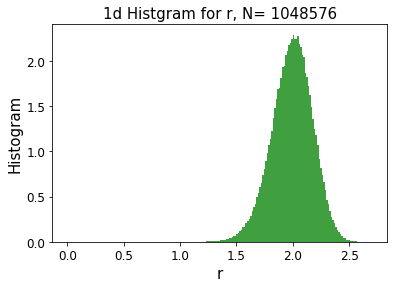

In [5]:
#square of sidelength 2L
L = 1

#number of trials
N = 2**20


x,y = Markov_chain(L, N)

#save distances from origin
r = []

for (x_pos,y_pos) in zip(x,y):
    r.append(np.sqrt(x_pos**2 + y_pos**2))
    
#plot 1d histogram for r
n, bins, patches = plt.hist(r, bins=200, density=True, facecolor='g', alpha=0.75)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('1d Histgram for r, N= '+str(N)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('r', fontsize=15)
plt.show()

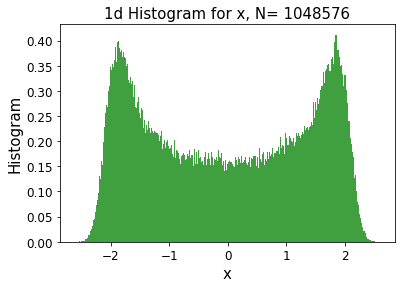

In [6]:
#1d histogram for x
n, bins, patches = plt.hist(x, bins=500, density=True, facecolor='g', alpha=0.75)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('1d Histogram for x, N= '+str(N)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.show()

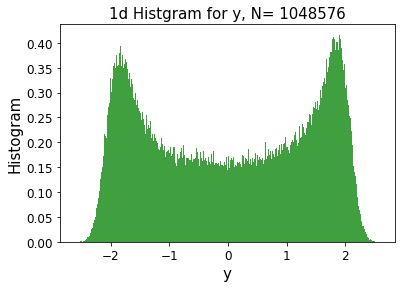

In [7]:
#1d histogram for y
n, bins, patches = plt.hist(y, bins=500, density=True, facecolor='g', alpha=0.75)    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('1d Histgram for y, N= '+str(N)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('y', fontsize=15)
plt.show()

Indeed $x$ and $y$ behave analogously, as expected for a potential that depends exclusively on $r= \sqrt{ x^2 + y^2}$.

Now plot a 2d histogram.

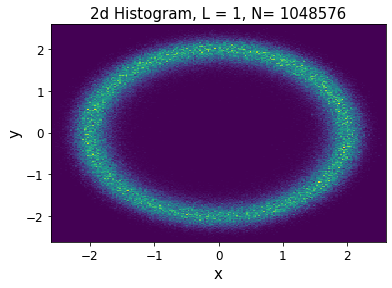

In [8]:
#2d histogram, L=1
h, xedges, yedges, image = plt.hist2d(x, y, bins=200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('2d Histogram, L = ' + str(L) +', N= '+str(N)+'', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.show()

The mexican hat is nicely visible!


* **Question 2**:  Implement the bunching method  on the data of the two observables. Provide an estimation of the correlation time using previous figures. 


#### Answer space  (two figures are expected)

$$ \tau_x \approx 256 $$

$$ \tau_r \approx 32 $$

Is the correlation time different for the two observables? Why? (be synthetic)

----------------------------------------------------------------------------------------------

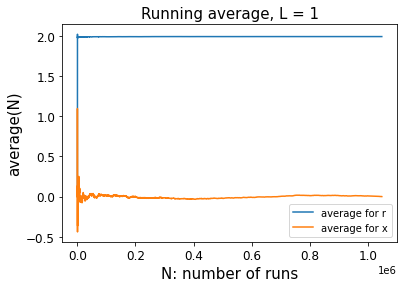

In [9]:
#average the observables
r_aver = []
x_aver = []

r_aver.append(r[0])
x_aver.append(x[0])

#iterate skipping first entry/initial position
for i in (range(N)[2:]):
    
    r_aver.append((r_aver[-1]*(i-1) + r[i])*(1/i))
    x_aver.append((x_aver[-1]*(i-1) + x[i])*(1/i))
    
plt.plot(range(N)[1:], r_aver, label="average for r")
plt.plot(range(N)[1:], x_aver, label="average for x")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Running average, L = " + str(L) , fontsize=15)
plt.xlabel("N: number of runs", fontsize=15)
plt.ylabel("average(N)", fontsize=15)
plt.legend()
plt.show()

Already from the running averages it is easy to see, that $r$ converges faster than $x$. In other words, the correlation time $\tau_r < \tau_x$.

This makes a lot of sense since $r$ is composed of $x$ and $y$, so its correlation time will be smaller than that of the individual, independently drawn variables. However this does not explain the difference entirely, to sample $x$ one has to run along the valley from $0$ to $2 \pi$, whereas for $r$ we have a narrow distribution peaked at $2$. This is the dominant effect explaining the different correlation times.

Now for the bunching method:

In [10]:
print("No bunching at all:")
print("mean of r: " + str(np.mean(r)) + " and its error: " + str(np.std(r)/np.sqrt(N)))
print("mean of x: " + str(np.mean(x)) + " and its error: " + str(np.std(x)/np.sqrt(N)))

No bunching at all:
mean of r: 1.9917265807405033 and its error: 0.000175342298432935
mean of x: 0.0002632497322084095 and its error: 0.0013815069334974033


In [11]:
#number of bunching iterations
bunching_iter = 18

#save results here
bunching_err_r = []
bunching_err_x = []

r_bunched = r.copy()
x_bunched = x.copy()

#iterate over bunching sizes, from 1 to bunching_iter
for i in range(bunching_iter):
    
    r_bunched = [(r_bunched[j]+r_bunched[j+1])/2 for j in range(0, len(r_bunched), 2)]
    x_bunched = [(x_bunched[j]+x_bunched[j+1])/2 for j in range(0, len(x_bunched), 2)]
    
    
    bunching_err_r.append(np.std(r_bunched)/np.sqrt(len(r_bunched)))
    bunching_err_x.append(np.std(x_bunched)/np.sqrt(len(x_bunched)))
    


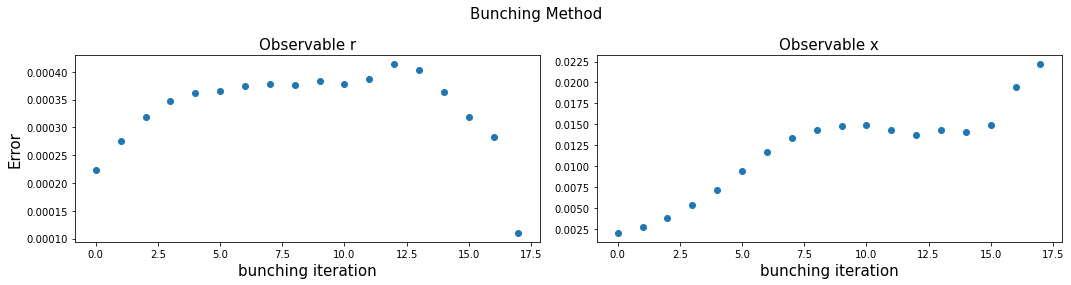

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle('Bunching Method', fontsize="15")
ax1.plot(bunching_err_r, 'o')
ax1.set_ylabel("Error", fontsize="15")
ax1.set_xlabel("bunching iteration", fontsize="15")
ax1.set_title('Observable r', fontsize="15")
ax2.plot(bunching_err_x, 'o')
ax2.set_title('Observable x', fontsize="15")
ax2.set_xlabel("bunching iteration", fontsize="15")
plt.tight_layout()
plt.show()

Roughly eight bunching iterations are needed to reach the expected plateau for $x$ and five for $r$.

$\tau_r \approx 2^5 = 32$

$\tau_x \approx 2^8 = 256$


* **Question 3**: Provide the estimation of both observables with their statistical erorrs:


#### Answer space 

$$ \langle x\rangle =  0.0003 \pm  0.015 $$

$$\langle r\rangle = 1.99173 \pm  0.00037 $$ 

----------------------------------------------------------------------------------------------

In [21]:
#error inside plateau
print("error for r: " + str(bunching_err_r[6]))
print("error for x: " + str(bunching_err_x[9]))

print("\n This gives:")
print("<r> = " + str(np.mean(r)) +"\t"+ chr(177) + str(bunching_err_r[6]))
print("<x> = " + str(np.mean(x)) +"\t"+ chr(177) + str(bunching_err_x[9]))

error for r: 0.0003735415672881963
error for x: 0.014758656784664467

 This gives:
<r> = 1.9917265807405033	±0.0003735415672881963
<x> = 0.0002632497322084095	±0.014758656784664467


The output of the previous program is a long list of correlated data: $x_0,x_1,\dots,x_i,\ldots$ and $r_0,r_1,\dots,r_i,\ldots$
For both observables one can study statistical correlations via the following autocorrelation functions 

$$C_r(n)= \langle (r_i-\langle r\rangle)(r_{i+n}-\langle r\rangle)\rangle $$

$$ C_x(n)= \langle (x_i-\langle x\rangle)(x_{i+n}-\langle x\rangle)\rangle $$

Here we consider a single long Markov chain so that both $C_r(n)$ and $C_x(n)$ are independent of $i$, so that the stationary limit is reached.

* **Question 4**: Estimate numerically both $C_r(n)$ and $C_x(n)$ for $n=0,1,\ldots, n_{\text{range}}$.
The goal is to observe the decay to zero of the correlations. A value of $n_{\text{range}}$ much smaller then the correlation time of the considered observable does not show the decay to zero. A large value of $n_{\text{range}}$ will focus on the region where the correlations are almost zero. Moreover when $n_{\text{range}}\approx N_{\text trials}$ strong fluctuations occurs for the lack of statistics. Try to find a good value of $n_{\text{range}}$ for each observable. 

#### Answer space
A program for the data analysis with two nice linear plots. Correct values of $n_{\text{range}}$ are expected.

----------------------------------------------------------------------------------------------

In [14]:
#returns a measure for the correlation in lst across distance n
def C_autocorr(lst, n, mean):
    
    #values to average over at the end
    c = []
    
    for i in range(len(lst) - n):
        c.append((lst[i] - mean)*(lst[i+n] - mean))
        
    return np.mean(c)
        

In [15]:
ns = range(1, 500)
r_mean = np.mean(r)

cs_r = [C_autocorr(r, n, r_mean) for n in ns]

In [16]:
x_mean = np.mean(x)

cs_x = [C_autocorr(x, n, x_mean) for n in ns]

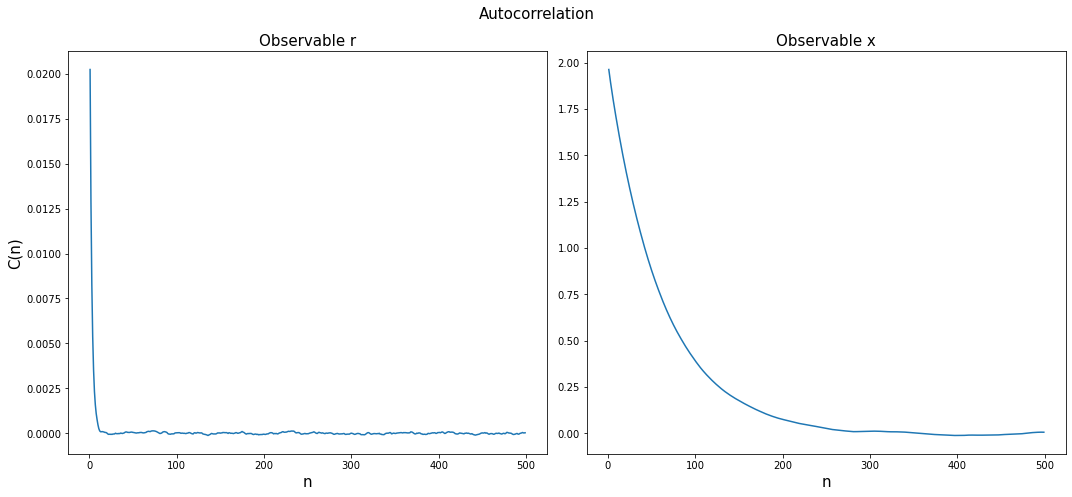

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle('Autocorrelation', fontsize="15")
ax1.plot(ns, cs_r)
ax1.set_ylabel("C(n)", fontsize="15")
ax1.set_xlabel("n", fontsize="15")
ax1.set_title('Observable r', fontsize="15")
ax2.plot(ns, cs_x)
ax2.set_title('Observable x', fontsize="15")
ax2.set_xlabel("n", fontsize="15")
plt.tight_layout()
plt.show()

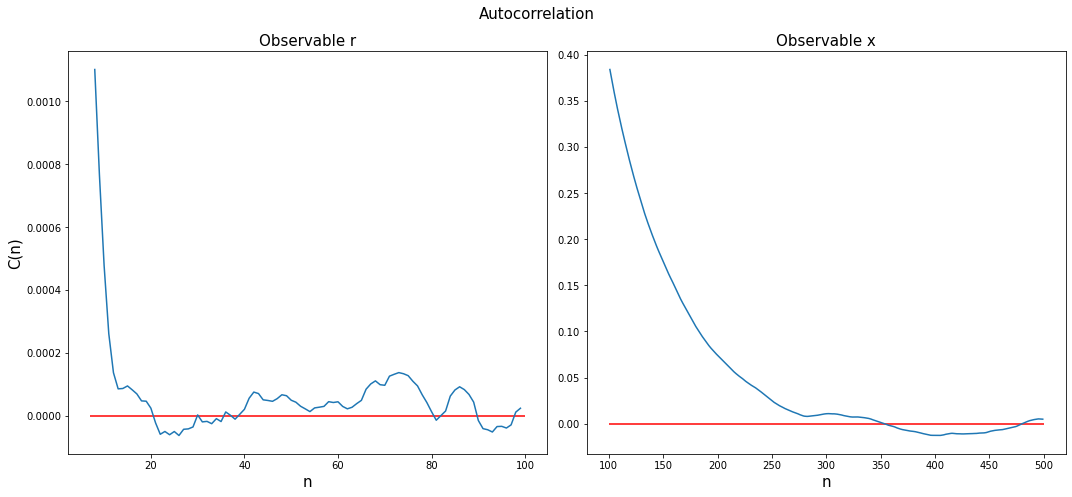

In [18]:
#start and end at different ns for better visibility

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle('Autocorrelation', fontsize="15")
ax1.plot(ns[7:-400], cs_r[7:-400])
ax1.set_ylabel("C(n)", fontsize="15")
ax1.set_xlabel("n", fontsize="15")
ax1.set_title('Observable r', fontsize="15")
ax1.hlines(0, 7, 100, color='r')
ax2.plot(ns[100:], cs_x[100:])
ax2.set_title('Observable x', fontsize="15")
ax2.set_xlabel("n", fontsize="15")
ax2.hlines(0, 100, 500, color='r')
plt.tight_layout()
plt.show()

Good values for $n_{range}$, that I will use moving forward:

$n_r = 20$

$n_x = 450$

 
* **Question 5**: Check numerically if the errors obtained using the following formula 

$$ \text{error} = \sqrt{\frac{C(0) + 2 \sum_{n=1}^{n_{\text{range}}} C(n)}{N_{\text{trials}}}} $$

are consistent with the results obtained using the bunching method

#### Answer space 

$$ \langle x\rangle = 1.99173 \pm 0.0003 $$

$$\langle r\rangle = 0.0003 \pm 0.015 $$

This result is (or not is) consistent with the error found with the bunching method.

--------------------------------

In [22]:
#returns error obtained from autocorrelations
def error_autocorr(cs, N_range, N):
    
    return np.sqrt((cs[0]+2*np.sum(cs[1:-(len(cs)-N_range)]))/N)

#values found for n_range for r and x
N_r = 20
N_x = 450

print("\n Obtained using autocorrelations:")
print("<r> = " + str(r_mean) +"\t"+ chr(177) + str(error_autocorr(cs_r, N_r, N)))
print("<x> = " + str(x_mean) +"\t"+ chr(177) + str(error_autocorr(cs_x, N_x, N)))

print("\n Obtained using bunching method:")
print("<r> = " + str(np.mean(r)) +"\t"+ chr(177) + str(bunching_err_r[6]))
print("<x> = " + str(np.mean(x)) +"\t"+ chr(177) + str(bunching_err_x[9]))
                


 Obtained using autocorrelations:
<r> = 1.9917265807405033	±0.0003006054443214601
<x> = 0.0002632497322084095	±0.01498990287145887

 Obtained using bunching method:
<r> = 1.9917265807405033	±0.0003735415672881963
<x> = 0.0002632497322084095	±0.014758656784664467


Both methods closely agree.

## <center>Part II:  Markov chain and Google's PageRank </center>

### References

* <a href="http://infolab.stanford.edu/~backrub/google.html">The original PageRank paper by Google’s founders Sergey Brin and Lawrence Page</a>
* A useful lecture is the <a href="http://infolab.stanford.edu/~ullman/mmds/ch5.pdf">Chap. 5 of Mining of Massive Datasets by J. Leskovec, A. Rajaraman, J. Ullman</a>

In the first lecture, we introduced the MCMC (Markov Chain Monte Carlo) and its most famous representative : the Metropolis algorithm. We also discussed the properties of the transition (or Markov) matrix and the convergence of the MCMC. Here we will see a second and very important application of the transition matrix: the PageRank.

### History

The World Wide Web was born in the nineties and grew up very fast. There were 623 web sites in 1993, more than one million in 1997, and today we can count more than a billion of web sites. How to find your desired web page in such a jungle?

At the end of the nineties the most popular search engines, like AltaVista or Yahoo!, were focused on the relevance of some keywords: a short list of results was obtained by estimating the number of occurrence and the location (title, abstract, main text...) of the keywords in the document. Unfortunately spam sites were able to find their way to get in that list by repeating many keywords. In 1997, the top search results of the keyword 'Titanic' contains only a small fraction of sites dedicated to the sad story of the British passenger liner or to the very new movie with Leo Di Caprio and Kate Winslet.

To fight against Spam farms two students of Standford, Brin and Page, proposed as a solution to this problem, PangeRank, an algorithm that establishes the importance of a web site using transition matrix theory. Thanks to this idea, Brin and Page founded in 1998 a new company: Google.

### The Idea

The World Wide Web has the topological structure of an oriented graph: a site can link to (and be linked by) other sites. 

In their original paper Brin and Page imagine a Random Surfer that at each time-step moves from a visited page to a new one by selecting at random one of the possible links. The PageRank of the WWW is given by the occupation probabilities of the sites in the stationary state.

### WWW graph and ranking

Consider a site $a$ that links to list of sites, that we call neighbor$[a]=[a_1,a_2,\ldots]$. For an oriented graph the fact that $a_1$ is in the list of neighbor$[a]$ does not imply that  $a$ is in the list of neighbor$[a_1]$ . We note $L_a$ the number of **outgoing** links of $a$:
$$ L_a = \text{len}(\text{neighbor}[a])$$
The transition (Markov) matrix for a random  surfer is such that 
$$T_{ba}$$




 corresponding to the move from $a\to b$ is equal to $1/L_a$ if $a$ and $b$ are connected and $0$ otherwise, where $L_a$ is the number of **outgoing** links of $a$, i.e. equiprobability to go out of $a$ towards any of the accessible pages. The occupation probability $\pi_a$ is called the PageRank, $\text{PR}(a)= \pi_a$ associated to page $a$.   Starting from the general global balance equation
$$  \sum_{b\ne a} \pi_a p_{a \to b} = \sum_{b\ne a} \pi_b p_{b \to a}$$
You can show the validity of the PageRank equation written by Page and Brin
$$ \text{PR}(a) = \sum_{b \text{ connected to } a} \frac{\text{PR}(b)}{L_b} $$

### The 3x3 peble game with PageRank

To provide a concrete example consider again the traditional $3\times 3$ pebble game but implement the PageRank algorithm instead of the Metropolis algorithm.

**Q6:** Find the stationary state of this specific Markov chain. Are the position still evenly sampled?

**Answer space**

the stationary state for PageRank is (a program is expected)

$$ \pi(1)=0.083 ,\pi(2)=0.125 ,\pi(3)=0.083, \pi(4)=0.125,\pi(5)=0.167,\pi(6)=0.125,
\pi(7)=0.083 ,\pi(8)=0.125 ,\pi(9)= 0.083 $$

--------------------------------------------

stationary state found: [0.24253563+0.j 0.36380344+0.j 0.24253563+0.j 0.36380344+0.j
 0.48507125+0.j 0.36380344+0.j 0.24253563+0.j 0.36380344+0.j
 0.24253563+0.j]

page ranks: [0.08333333+0.j 0.125     +0.j 0.08333333+0.j 0.125     +0.j
 0.16666667+0.j 0.125     +0.j 0.08333333+0.j 0.125     +0.j
 0.08333333+0.j]

eigenvalue: (0.9999999999999998+0j)


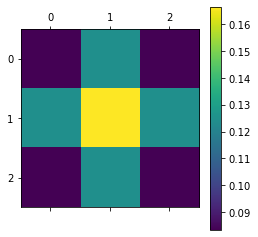

In [3]:
#copied list of neighbors
neighbors =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

#set up markov matrix
markov = np.zeros((9,9))

#set up Ls for all positions
Ls = np.zeros(9)

#matrix elements, no self loops
for i in range(9):
     
        #first, compute L_i
        for neighbor in neighbors[i]:
            if neighbor != i:
                Ls[i] += 1
        
        #second, write matrix entries
        for j in neighbors[i]:
            if j != i:
                markov[j,i] = 1/Ls[i]      
                
#find eigenstates
eigenvalues, eigenvectors = np.linalg.eig(markov)

#save stationary state here
stat_state = np.zeros(9)

#stationary state corresponds to eigenvalue +1, transpose eigenvectors to get columns!
for (eigenvalue, eigenvector) in zip(eigenvalues, eigenvectors.T):
    
    #compare up to reasonable precision
    if np.round(eigenvalue, decimals=10) == 1:
        stat_state = eigenvector
        print("stationary state found: " + str(eigenvector) + "\n")
        print("page ranks: " + str(eigenvector*(1/np.sum(eigenvector))) + "\n")
        print("eigenvalue: " + str(eigenvalue))
        break


stat_weights = np.reshape(stat_state*(1/np.sum(stat_state)), (3,3))
cax = plt.matshow(np.round(np.abs(stat_weights), decimals=6))
cbar = plt.colorbar(cax)
plt.show()

In [448]:
#check whether we really found the stationary eigenstate
state = stat_state.copy()

for i in range(10):
    state = np.matmul(markov, state)

print("Change after applying the markov matrix ten times: ")
print(np.round(state - stat_state, decimals=15))

Change after applying the markov matrix ten times: 
[ 0.+0.j  0.+0.j -0.+0.j  0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j -0.+0.j]


The positions are no longer evenly sampled, instead the squares with many neighbours are visited more often.

**Q7:** By studying the spectrum of the Markov matrix, determine the properties of the Markov chain (periodic or aperiodic, reducible or irreducible).

**Answer space**

...

-----------------------------------------------------------------------

In [449]:
#is the Markov chain periodic?
for eigenvalue in eigenvalues:
    
    #check if |λ| = 1 and λ != 1
    if (np.round(np.abs(eigenvalue),decimals=10)==1) and not(np.round(eigenvalue, decimals=10)==1):
        print("Markov chain is periodic due to its eigenvalue: " + str(eigenvalue))

Markov chain is periodic due to its eigenvalue: (-0.9999999999999999+0j)


Also the Markov matrix is irreducible, since we can reach every position from every other position in a finite number of steps.

### Dead Ends and Spider Traps

The PageRank described above works if the Markov matrix is irreducible, 
but several snares are hidden in the WWW: the Surfer can find a **dead end**, 
    namely a web page that does not contain links, or, even worst, can jump 
    in a **spider trap**, e.g. a set of nodes with no dead ends but no links with the outside world. 

The strategy to deal with them is called taxation. It relies on a damping parameter $d$ that we take in the interval $[0,1]$ (usually $d=0.85$) The novel dynamics can be written as
$$ \vec{\pi}(t+1) = d\, T\vec{\pi}(t) + \frac{1−d}{n}\vec{J}\quad \text{ where }\vec{J} = \begin{pmatrix} 1\\ \vdots \\1\end{pmatrix} $$
here $n$ is the total number of web page.
One can show that in presence of taxation the PageRank formula writes
$$ \text{PR}(a) = d\sum_{b \text{ connected to } a} \frac{\text{PR}(b)}{L_b} + \frac{1−d}{n}  $$
Taxation modifies the dynamics of Random Surfers and solves the problem of both spider traps and dead ends. 

**Question 8:** Provide the PageRank with this prescription and 𝑑=0.85 for the nieghbor below drawn above.  Identify the dead end or the spider trap.




**Answer space**

A program is expected to answer this question. 

The final PageRank for the $6$ page is

$$ \pi(1)=0.116, \quad  \pi(2)= 0.107, \quad \pi(3)= 0.107$$
$$ \pi(4)=0.116, \quad  \pi(5)= 0.285, \quad \pi(6)= 0.268$$


The sites... are...

--------------------------

In [364]:
neighbors_original = {1 : [2, 3], 2 : [1, 4], 3 : [1, 4], 4 : [2, 3, 5], 5 : [6], 6 : [5]}

In [3]:
neighbors_pr = [[1,2], [0,3], [0,3], [1,2,4], [5], [4]]

#number of pages
n = 6

#damping parameter
d = 0.85

#set up markov matrix
markov_pr = np.zeros((n,n))

#set up Ls for all positions
Ls_pr = np.zeros(n)

#matrix elements, no self loops
for i in range(n):
     
        #first, compute L_i
        for neighbor in neighbors_pr[i]:
            if neighbor != i:
                Ls_pr[i] += 1
        
        #second, write matrix entries
        for j in neighbors_pr[i]:
            if j != i:
                markov_pr[j,i] = 1/Ls_pr[i]
                

#solve system of linear equations
a = d*markov_pr - np.identity(n)
b = (-(1-d)/n)*np.ones(n)

stat_state_pr = np.linalg.solve(a, b)

print("page ranks/stationary state: ")
print(stat_state_pr)

page ranks/stationary state: 
[0.11623037 0.10732984 0.10732984 0.11623037 0.28534031 0.26753927]


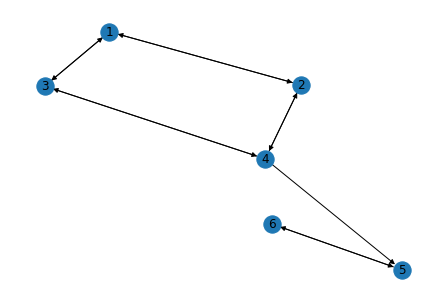

In [4]:
import networkx as nx

#create directed graph
DG = nx.DiGraph()

#add nodes
DG.add_nodes_from(range(n))
labels = {}
for node in range(n):
    labels[node] = str(node+1)

#add edges
for node in range(n):
    
    for neighbor in neighbors_pr[node]:
        DG.add_edge(node, neighbor)

#plot graph
nx.draw(DG, labels=labels)

It is clear that the nodes 5 and 6 represent a spider trap.

### PageRank performace:

The PageRank algorithm is a time-consuming process. One might think that a simplified ranking which counts the number of **ingoing** links of each page would be very similar. This is not the case. Below we use the e-mail network  of a EU research institution. The data taken from https://snap.stanford.edu/data/   has been pre-processed to help your work. In particular the marix 
$$\text{adj_matrix} [i,j] = 
\begin{cases}
1 \quad \text{if} \; j \; \text{sent at least an e-mail to} \; i \\
0 \quad \text{if} \; j\; \text{did not send an e-mail to} \; i
\end{cases}
$$
The Matris $T$ is the PageRank Markov matrix associated to $\text{adj_matrix} [i,j]$.
 
 
 **Question 9++**: 
 * Use the two methods and rank the first 4 pages of this complex network. (Use $d=0.85$)
 * Determine the number of possible stationary states, namely the number of clusters of the graph.


In [62]:
adj_matrix, T = np.load('net_data.npy', allow_pickle=True)

**Answer Space**
Difficult question to do at the very end.

Didn't know whether to start counting at $0$ or at $1$, decided to start at $1$ (just as in the previous exercises) so results might be off by one depending on definition.

In [35]:
#number of pages
n_pages = T.shape[0]

#damping parameter
d = 0.85

#naive method -> no damping/taxation
eigenvals, eigenvecs = np.linalg.eig(T)

#check degeneracy of +1 and 0
c1=0
c0=0

for entry in eigenvals:
    if entry == 1:
        c1 += 1
    elif entry == 0:
        c0 += 1

#stationary states
print("Analyse Markov matrix spectrum (no taxation implemented here): \n")

print("Degeneracy of eigenvalue +1 : " + str(c1))
if c1 > 1:
    print("Multiple stationary states are possible!")

print("\n")

#rank of Markov matrix
print("Degeneracy of eigenvalue 0 : " + str(c0))
if c0 != 0:
    print("PageRank Markov matrix does not have full rank!")
    


Analyse Markov matrix spectrum (no taxation implemented here): 

Degeneracy of eigenvalue +1 : 181
Multiple stationary states are possible!


Degeneracy of eigenvalue 0 : 14
PageRank Markov matrix does not have full rank!


In [31]:
#analyse stationary states

#count number of dead ends
dead_ends = 0
    
for (val,vec) in zip(eigenvals, eigenvecs.T):
    
    #look at stationary states only
    if val == 1:
        for entry in vec:
            if entry == 1:
                dead_ends += 1
            
print("number of dead ends: ") 
print(dead_ends)

number of dead ends: 
181


This means that the 181-fold degeneracy of the eigenvalue $\lambda = 1$, or rather the 181 possible stationary states can be explained in their entirety by the existance of 181 dead ends/clusters.

In [65]:
#first method -> count links, rank by number of links
link_ranks = np.zeros(n_pages)

#sum over rows, meaning over j or rather incoming mails
link_ranks = adj_matrix.sum(axis=1)
        
print("Results from counting links: \n")

#sort indices by rank to find first four pages 
link_ranking = np.argsort(link_ranks)

#print top four pages, +1 means we start indexing with 1
print("Top four pages/employees(from lowest to highest): ")
print((link_ranking[-4:] + 1))
print("The corresponding number of incoming links: ")
print(link_ranks[link_ranking[-4:]])

Results from counting links: 

Top four pages/employees(from lowest to highest): 
[122 108  63 161]
The corresponding number of incoming links: 
[157. 169. 179. 212.]


In [37]:
#second method -> solve system of linear equations with taxation
A = d*T - np.identity(n_pages)
B = (-(1-d)/n_pages)*np.ones(n_pages)

page_ranks = np.linalg.solve(A, B)

print("Algebraic results from PageRank with taxation: \n")

print("page ranks/stationary state: ")
print(page_ranks)
print("\n")

#sort indices by rank to find first four pages 
ranking = np.argsort(page_ranks)

#print top four pages, +1 means we start indexing with 1
print("Top four pages/employees(from lowest to highest): ")
print((ranking[-4:] + 1))
print("Their corresponding weights are: ")
print(page_ranks[ranking[-4:]])

Algebraic results from PageRank with taxation: 

page ranks/stationary state: 
[0.00104006 0.00816113 0.00170818 ... 0.00108804 0.00016498 0.00112345]


Top four pages/employees(from lowest to highest): 
[161 131 204   2]
Their corresponding weights are: 
[0.00550936 0.00596679 0.00672469 0.00816113]


In [45]:
#second method -> solve iteratively with taxation

#initial distribution
state = np.ones(n_pages)/n_pages

#number of iterations
n_iterations = 10**4

for i in range(n_iterations):
    state = d*np.matmul(T, state) + ((1-d)/n_pages)*np.ones(n_pages)



In [47]:
print("Results from iterative PageRank approach with taxation: \n")

#sort indices by rank to find first four pages 
ranking_iter = np.argsort(state)

#print top four pages, +1 means we start indexing with 1
print("Top five pages/employees(from lowest to highest): ")
print((ranking_iter[-4:] + 1))
print("Their corresponding weights are: ")
print(state[ranking_iter[-4:]])

Results from iterative PageRank approach with taxation: 

Top five pages/employees(from lowest to highest): 
[161 131 204   2]
Their corresponding weights are: 
[0.00550936 0.00596679 0.00672469 0.00816113]


The algebraic and iterative methods give exactly the same result! Obviously the extremly naive method of counting links gave a different result, which is lacklustre at best (only employee #161 appears in both rankings).